## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from nltk import tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

## Load preprocessed dataset

In [2]:
data = pd.read_csv("PreprocessedRealFake.csv")
data = data[(~data["text"].isna())]

## Wordcloud

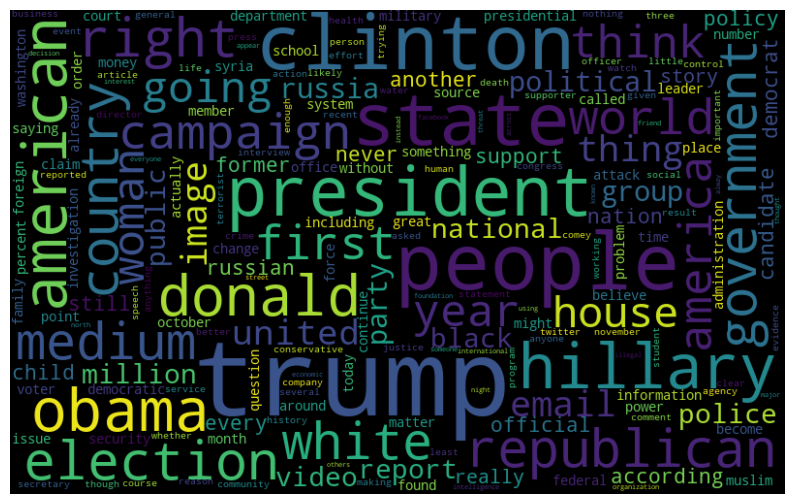

In [3]:
real_data = data[data["target"] == "real"]

all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

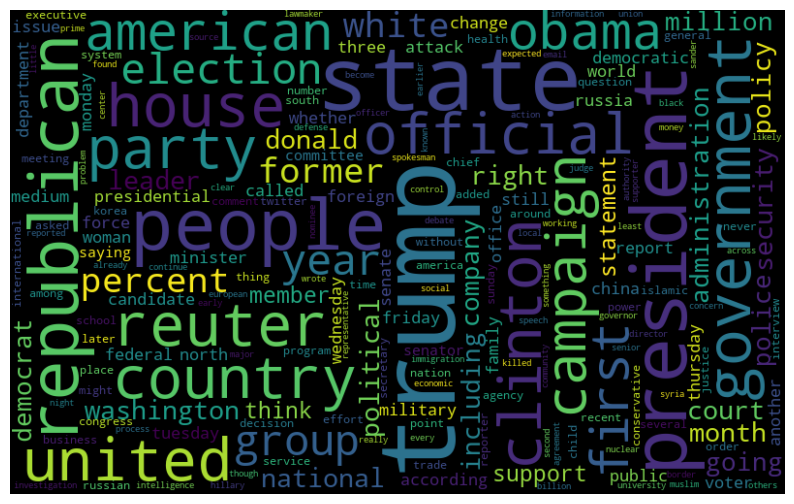

In [4]:
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words

In [5]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()
    
    return df_frequency

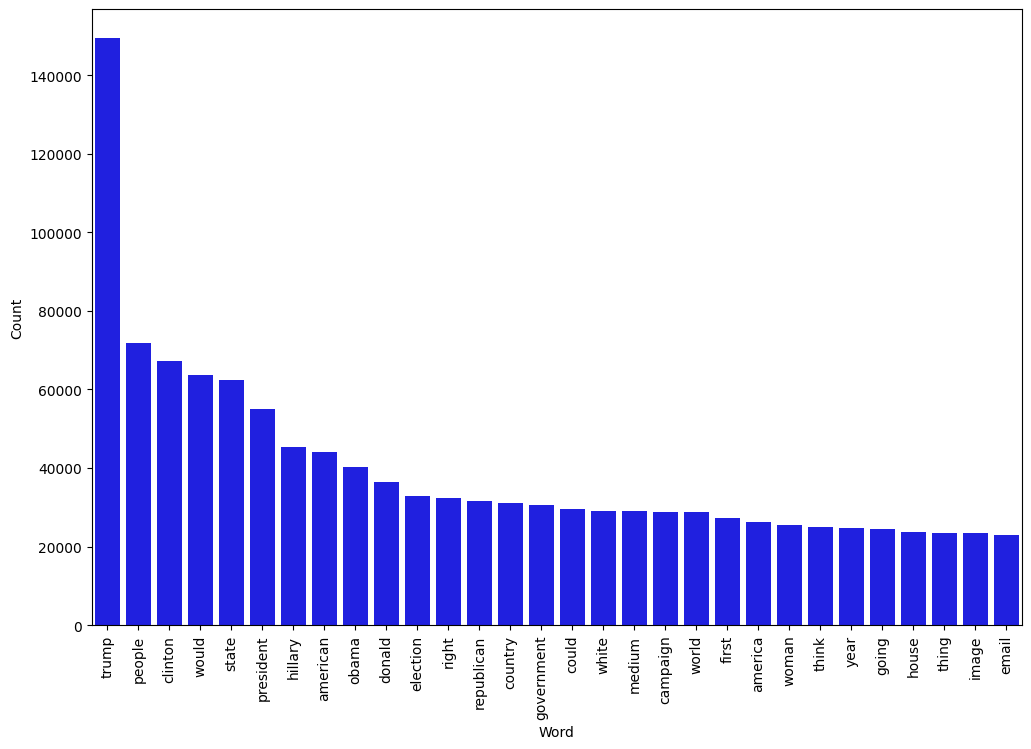

In [6]:
# Most frequent words in real tweets
realc = counter(real_data, "text", 30)

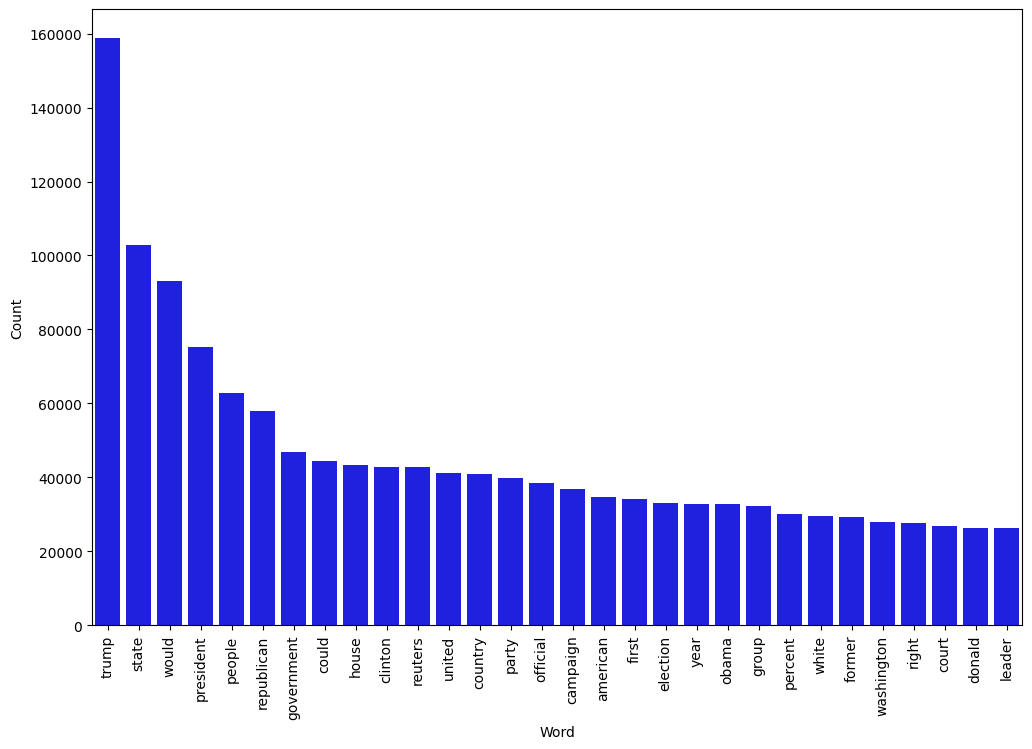

In [7]:
# Most frequent words in fake tweets
fakec = counter(fake_data, "text", 30)

## Load original dataset

In [8]:
df = pd.read_csv("FakeReal.csv")
df1 = df[pd.to_datetime(df['date'], errors='coerce').notnull()]
df1['date'] = pd.to_datetime(df1['date'])
df_count = df1.groupby('date').count()['title']

## Timeplot of real & fake news

In [9]:
fake_news = df[df["target"] == "fake"]
real_news = df[df["target"] == "real"]

In [10]:
# remove rows with invalid date strings
fake_news1 = fake_news[pd.to_datetime(fake_news['date'], errors='coerce').notnull()]
real_news1 = real_news[pd.to_datetime(real_news['date'], errors='coerce').notnull()]

In [11]:
# convert date column to datetime format
fake_news1['date'] = pd.to_datetime(fake_news1['date'])
real_news1['date'] = pd.to_datetime(real_news1['date'])

In [12]:
# group the news articles by date and count the number of articles
fake_news_count = fake_news1.groupby('date').count()['title']
real_news_count = real_news1.groupby('date').count()['title']

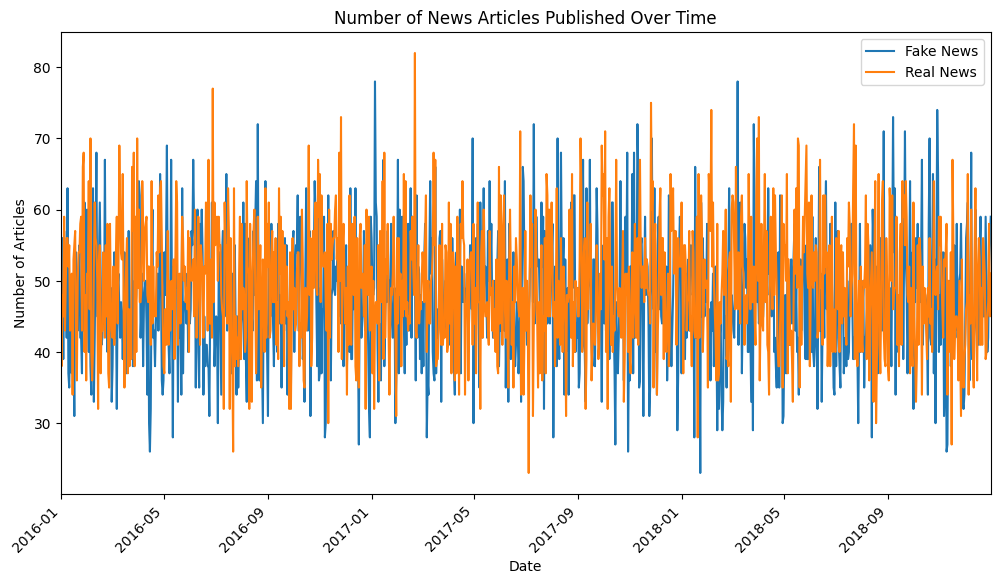

In [13]:
# set the figure size
plt.figure(figsize=(12, 6))

# plot the time series
plt.plot(fake_news_count.index, fake_news_count.values, label='Fake News')
plt.plot(real_news_count.index, real_news_count.values, label='Real News')
plt.legend()
# set x-axis limits to date range
plt.xlim(df_count.index.min(), df_count.index.max())
plt.title('Number of News Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# set the x-tick labels to the dates in the original format
plt.xticks(rotation=45, ha='right')
plt.show()

## Boxplot for News Article Length of Real & Fake News

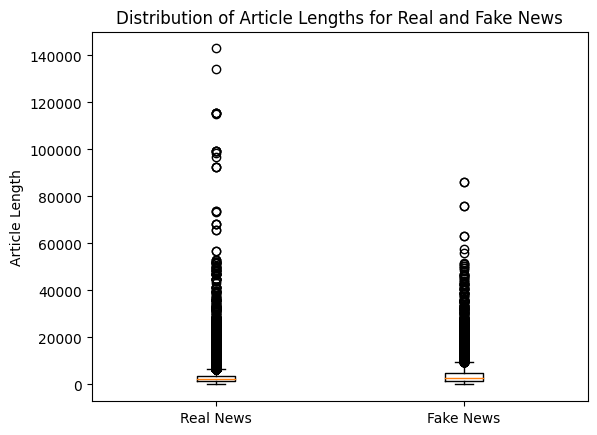

In [14]:
plt.boxplot([real_news['text'].str.len(), fake_news['text'].str.len()])
plt.xticks([1, 2], ['Real News', 'Fake News'])
plt.ylabel('Article Length')
plt.title('Distribution of Article Lengths for Real and Fake News')
plt.show()

## Real & Fake news pie-chart

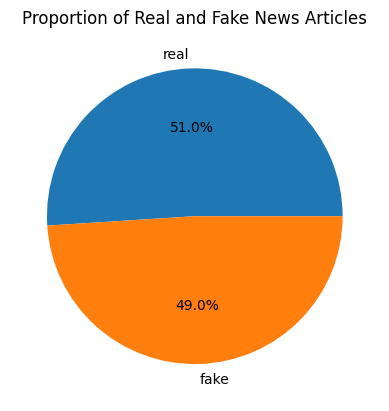

In [15]:
counts = df['target'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Proportion of Real and Fake News Articles')
plt.show()